In [27]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [ ]:
# load data and exploar some data
data = pd.read_csv(r"C:\Users\91852\Downloads\data visullation project\Bookings.csv")
data.head(4)
data.tail(5)
data.shape

(103024, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  float64
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [ ]:
# checing null in columns
data.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
dtype: int64

In [7]:
# checking total number of null
data.isnull().sum().sum()

np.int64(510555)

In [ ]:
# columns wise missing data
data.isnull().sum()/ len(data)*100

Date                           0.000000
Time                           0.000000
Booking_ID                     0.000000
Booking_Status                 0.000000
Customer_ID                    0.000000
Vehicle_Type                   0.000000
Pickup_Location                0.000000
Drop_Location                  0.000000
V_TAT                         37.910584
C_TAT                         37.910584
Canceled_Rides_by_Customer    89.809171
Canceled_Rides_by_Driver      82.107082
Incomplete_Rides              37.910584
Incomplete_Rides_Reason       96.189237
Booking_Value                  0.000000
Payment_Method                37.910584
Ride_Distance                  0.000000
Driver_Ratings                37.910584
Customer_Rating               37.910584
dtype: float64

In [ ]:
# overall missing data
data.isnull().sum().sum() / (data.shape[0]*data.shape[1]) * 100

np.float64(26.08257861223956)

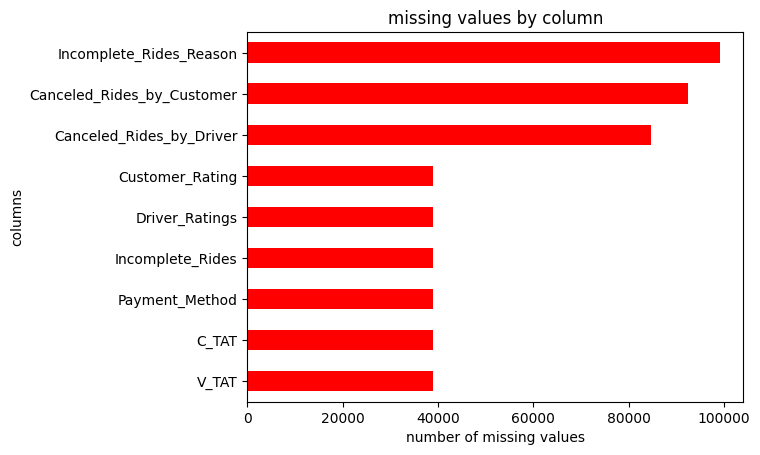

In [21]:
# missing values see in barplot
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]

plt.Figure(figsize=(10,6))
missing_data.sort_values().plot(kind='barh',color='red')
plt.title("missing values by column")
plt.xlabel("number of missing values")
plt.ylabel("columns")
plt.show()

In [ ]:
# checking mean of data64 & float64
numeric_cols = data.select_dtypes(include=["float64","int64"]).columns
numeric_means = data[numeric_cols].mean()
print(numeric_means)

Time                 0.499045
V_TAT              170.876952
C_TAT               84.873372
Booking_Value      548.751883
Ride_Distance       14.189927
Driver_Ratings       3.997457
Customer_Rating      3.998313
dtype: float64


In [ ]:
# fill missing values with mean
numeric_cols = data.select_dtypes(include=["float64","int64"]).columns
for col in numeric_cols:
    mean_vales = data[col].mean()
    data[col].fillna(mean_vales,inplace=True)

In [ ]:
# checking missing values
numeric_cols = data.select_dtypes(include=["float64","int64"]).columns
null_in_numeric = data[numeric_cols].isnull().sum()
print(null_in_numeric)

Time               0
V_TAT              0
C_TAT              0
Booking_Value      0
Ride_Distance      0
Driver_Ratings     0
Customer_Rating    0
dtype: int64


In [ ]:
# checking missing values in object data type
object_cols = data.select_dtypes(include=["object"]).columns
nulls_in_objects = data[object_cols].isnull().sum()
print(nulls_in_objects)

Date                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Payment_Method                39057
dtype: int64


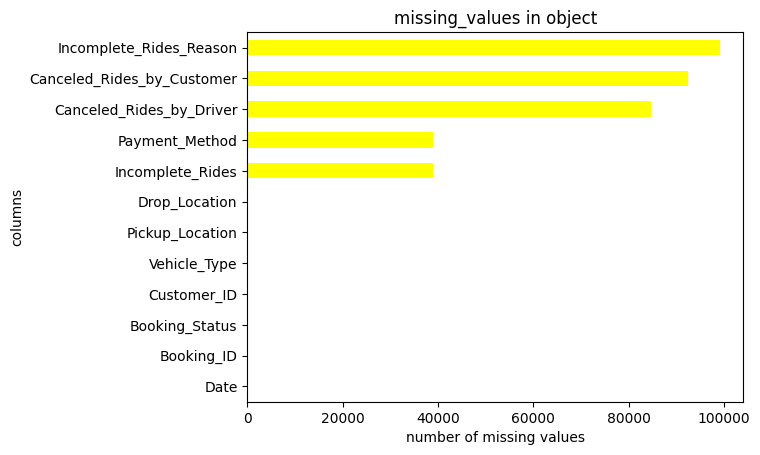

In [ ]:
# see missing values in a barchart
object_cols = data.select_dtypes(include=["object"]).columns
missing_object = data[object_cols].isnull().sum()
missing_data = missing_data[missing_data > 0]

plt.Figure(figsize=(10,6))
missing_object.sort_values().plot(kind='barh',color="yellow")
plt.title("missing_values in object")
plt.xlabel("number of missing values")
plt.ylabel("columns")
plt.show()

In [ ]:
# fill missing value with mode
object_cols = data.select_dtypes(include=["object"]).columns
modes = {col: data[col].mode()[0] for col in object_cols}
print("mode of all object")
for col,mode_value in modes.items():
    print(f"{col}: {mode_value}")

mode of all object
Date: 01-07-2024 20:09
Booking_ID: CNR1000051055
Booking_Status: Success
Customer_ID: CID954071
Vehicle_Type: Prime Sedan
Pickup_Location: Banashankari
Drop_Location: Peenya
Canceled_Rides_by_Customer: Driver is not moving towards pickup location
Canceled_Rides_by_Driver: Personal & Car related issue
Incomplete_Rides: No
Incomplete_Rides_Reason: Customer Demand
Payment_Method: Cash


In [ ]:
# filling missing data with the help of mode
obj_cols = data.select_dtypes(['object']).columns
mode_dict = {col: data[col].mode()[0] for col in obj_cols}
data.fillna(value=mode_dict, inplace=True)

print(data[obj_cols].isnull().sum())

Date                          0
Booking_ID                    0
Booking_Status                0
Customer_ID                   0
Vehicle_Type                  0
Pickup_Location               0
Drop_Location                 0
Canceled_Rides_by_Customer    0
Canceled_Rides_by_Driver      0
Incomplete_Rides              0
Incomplete_Rides_Reason       0
Payment_Method                0
dtype: int64


In [37]:
data.isnull().sum()

Date                          0
Time                          0
Booking_ID                    0
Booking_Status                0
Customer_ID                   0
Vehicle_Type                  0
Pickup_Location               0
Drop_Location                 0
V_TAT                         0
C_TAT                         0
Canceled_Rides_by_Customer    0
Canceled_Rides_by_Driver      0
Incomplete_Rides              0
Incomplete_Rides_Reason       0
Booking_Value                 0
Payment_Method                0
Ride_Distance                 0
Driver_Ratings                0
Customer_Rating               0
dtype: int64